In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')

In [3]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
test.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0


In [6]:
train.shape,test.shape


((6019, 12), (1234, 11))

In [7]:
train.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

In [8]:
test.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats']

In [9]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [10]:
# Get names of columns with missing values
cols_with_missing = [col for col in train.columns
                     if train[col].isnull().any()]
print("Columns with missing values:")
print(cols_with_missing)

Columns with missing values:
['Mileage', 'Engine', 'Power', 'Seats']


### Splitting the name

In [11]:
train['Company'] = train.Name.str.split().str.get(0)
test['Company'] = test.Name.str.split().str.get(0)
train['Car_Name'] = train.Name.str.split().str.get(1)
test['Car_Name'] = test.Name.str.split().str.get(1)
train['Model'] = train.Name.str.split().str.get(2)
test['Model'] = test.Name.str.split().str.get(2)
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Car_Name,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon,R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,New


### Converting categorical variables to numeric values

In [12]:
train['Owner_Type']=train.Owner_Type.str.replace('First','1').str.replace('Second','2').str.replace('Third','3').str.replace('Fourth & Above','4').astype(int)
test['Owner_Type']=test.Owner_Type.str.replace('First','1').str.replace('Second','2').str.replace('Third','3').str.replace('Fourth & Above','4').astype(int)

In [13]:
train['Transmission']=train.Transmission.apply(lambda x:str(x).replace('Manual','0').replace('Automatic','1')).astype(int)
test['Transmission']=test.Transmission.apply(lambda x:str(x).replace('Manual','0').replace('Automatic','1')).astype(int)

In [14]:
train['Fuel_Type']=train.Fuel_Type.apply(lambda x:str(x).replace('CNG','0').replace('Diesel','1').replace('Petrol','2').replace('LPG','3').replace('Electric','4')).astype(int)
test['Fuel_Type']=test.Fuel_Type.apply(lambda x:str(x).replace('CNG','0').replace('Diesel','1').replace('Petrol','2').replace('LPG','3').replace('Electric','4')).astype(int)

In [15]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Car_Name,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,0,0,1,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon,R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,0,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,1.6
2,Honda Jazz V,Chennai,2011,46000,2,0,1,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,V
3,Maruti Ertiga VDI,Chennai,2012,87000,1,0,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,1,1,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,New


In [16]:
train['age'] = 2020 - train['Year']
test['age'] = 2020 - test['Year']

In [17]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
train["Location"]=number.fit_transform(train["Location"].astype('str'))
test["Location"]=number.fit_transform(test["Location"].astype('str'))
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Car_Name,Model,age
0,Maruti Wagon R LXI CNG,9,2010,72000,0,0,1,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon,R,10
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,0,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,1.6,5
2,Honda Jazz V,2,2011,46000,2,0,1,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,V,9
3,Maruti Ertiga VDI,2,2012,87000,1,0,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,VDI,8
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,1,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,New,7


In [18]:
train["Company"]=number.fit_transform(train["Company"].astype('str'))
test["Company"]=number.fit_transform(test["Company"].astype('str'))
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Car_Name,Model,age
0,Maruti Wagon R LXI CNG,9,2010,72000,0,0,1,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,18,Wagon,R,10
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,0,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,10,Creta,1.6,5
2,Honda Jazz V,2,2011,46000,2,0,1,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,9,Jazz,V,9
3,Maruti Ertiga VDI,2,2012,87000,1,0,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,18,Ertiga,VDI,8
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,1,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,1,A4,New,7


In [19]:

train["Car_Name"]=number.fit_transform(train["Car_Name"].astype('str'))
test["Car_Name"]=number.fit_transform(test["Car_Name"].astype('str'))
train["Model"]=number.fit_transform(train["Model"].astype('str'))
test["Model"]=number.fit_transform(test["Model"].astype('str'))

In [20]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Car_Name,Model,age
0,Maruti Wagon R LXI CNG,9,2010,72000,0,0,1,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,18,189,231,10
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,0,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,10,53,10,5
2,Honda Jazz V,2,2011,46000,2,0,1,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,9,99,280,9
3,Maruti Ertiga VDI,2,2012,87000,1,0,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,18,69,286,8
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,1,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,1,10,221,7


In [21]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Car_Name,Model,age
0,Maruti Wagon R LXI CNG,9,2010,72000,0,0,1,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,18,189,231,10
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,0,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,10,53,10,5
2,Honda Jazz V,2,2011,46000,2,0,1,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,9,99,280,9
3,Maruti Ertiga VDI,2,2012,87000,1,0,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,18,69,286,8
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,1,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,1,10,221,7


In [22]:
# Let's deal with them one by one.

train['Seats'].fillna(5,inplace=True)
test['Seats'].fillna(5,inplace=True)

In [23]:
train['Year'] = train['Year'].astype('category')
train['Location'] = train['Location'].astype('category')
train['Fuel_Type'] = train['Fuel_Type'].astype('category')
train['Transmission'] = train['Transmission'].astype('category')
train['Owner_Type'] = train['Owner_Type'].astype('category')

In [24]:
test['Year'] = test['Year'].astype('category')
test['Location'] = test['Location'].astype('category')
test['Fuel_Type'] = test['Fuel_Type'].astype('category')
test['Transmission'] = test['Transmission'].astype('category')
test['Owner_Type'] = test['Owner_Type'].astype('category')

In [25]:
train['Mileage'] = train['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)

train['Engine'] = train['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)

train['Power'] = train['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)

In [26]:
test['Mileage'] = test['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)

test['Engine'] = test['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)

test['Power'] = test['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)

In [27]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Car_Name,Model,age
0,Maruti Wagon R LXI CNG,9,2010,72000,0,0,1,26.60,998.0,58.16,5.0,1.75,18,189,231,10
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,0,1,19.67,1582.0,126.20,5.0,12.50,10,53,10,5
2,Honda Jazz V,2,2011,46000,2,0,1,18.20,1199.0,88.70,5.0,4.50,9,99,280,9
3,Maruti Ertiga VDI,2,2012,87000,1,0,1,20.77,1248.0,88.76,7.0,6.00,18,69,286,8
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,1,2,15.20,1968.0,140.80,5.0,17.74,1,10,221,7


In [28]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company,Car_Name,Model,age
0,Maruti Alto K10 LXI CNG,4,2014,40929,0,0,1,32.26,998.0,58.20,4.0,16,16,128,6
1,Maruti Alto 800 2016-2019 LXI,3,2013,54493,2,0,2,24.70,796.0,47.30,5.0,16,16,56,7
2,Toyota Innova Crysta Touring Sport 2.4 MT,9,2017,34000,1,0,1,13.68,2393.0,147.80,7.0,26,78,86,3
3,Toyota Etios Liva GD,5,2012,139000,1,0,1,23.59,1364.0,0.00,5.0,26,60,139,8
4,Hyundai i20 Magna,9,2014,29000,2,0,1,18.50,1197.0,82.85,5.0,9,159,145,6


In [29]:
del test["Year"]
del train["Year"]

In [30]:
test.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company,Car_Name,Model,age
0,Maruti Alto K10 LXI CNG,4,40929,0,0,1,32.26,998.0,58.20,4.0,16,16,128,6
1,Maruti Alto 800 2016-2019 LXI,3,54493,2,0,2,24.70,796.0,47.30,5.0,16,16,56,7
2,Toyota Innova Crysta Touring Sport 2.4 MT,9,34000,1,0,1,13.68,2393.0,147.80,7.0,26,78,86,3
3,Toyota Etios Liva GD,5,139000,1,0,1,23.59,1364.0,0.00,5.0,26,60,139,8
4,Hyundai i20 Magna,9,29000,2,0,1,18.50,1197.0,82.85,5.0,9,159,145,6


In [31]:
train.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Car_Name,Model,age
0,Maruti Wagon R LXI CNG,9,72000,0,0,1,26.60,998.0,58.16,5.0,1.75,18,189,231,10
1,Hyundai Creta 1.6 CRDi SX Option,10,41000,1,0,1,19.67,1582.0,126.20,5.0,12.50,10,53,10,5
2,Honda Jazz V,2,46000,2,0,1,18.20,1199.0,88.70,5.0,4.50,9,99,280,9
3,Maruti Ertiga VDI,2,87000,1,0,1,20.77,1248.0,88.76,7.0,6.00,18,69,286,8
4,Audi A4 New 2.0 TDI Multitronic,3,40670,1,1,2,15.20,1968.0,140.80,5.0,17.74,1,10,221,7


In [32]:
train.isnull().any()

Name                 False
Location             False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage               True
Engine                True
Power                 True
Seats                False
Price                False
Company              False
Car_Name             False
Model                False
age                  False
dtype: bool

In [33]:
train['Mileage'].fillna(train['Mileage'].median(),inplace=True)

In [34]:
train.isnull().any()

Name                 False
Location             False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage              False
Engine                True
Power                 True
Seats                False
Price                False
Company              False
Car_Name             False
Model                False
age                  False
dtype: bool

In [35]:
test['Engine'].fillna(test['Engine'].median(),inplace=True)
test['Power'].fillna(test['Power'].median(),inplace=True)

In [36]:
train['Engine'].fillna(train['Engine'].median(),inplace=True)
train['Power'].fillna(train['Power'].median(),inplace=True)

In [37]:
test.isnull().any()

Name                 False
Location             False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage              False
Engine               False
Power                False
Seats                False
Company              False
Car_Name             False
Model                False
age                  False
dtype: bool

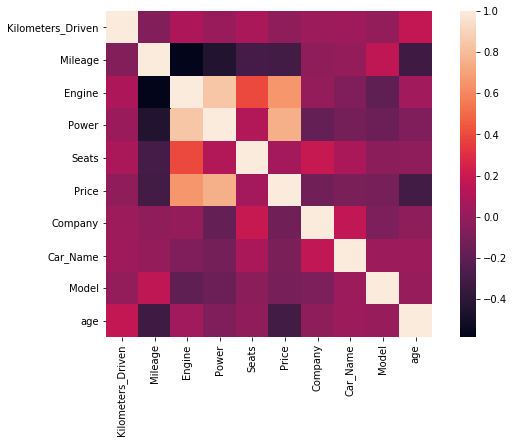

In [38]:
corr = train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, vmax=1, square=True)

In [39]:
train.corr()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Company,Car_Name,Model,age
Kilometers_Driven,1.000000,-0.065253,0.090890,0.023991,0.082782,-0.011493,0.028232,0.034198,-0.000488,0.173048
Mileage,-0.065253,1.000000,-0.586404,-0.441802,-0.299632,-0.306588,-0.013373,0.002763,0.161304,-0.321534
Engine,0.090890,-0.586404,1.000000,0.840965,0.393368,0.657347,0.008120,-0.074722,-0.193268,0.050086
Power,0.023991,-0.441802,0.840965,1.000000,0.109676,0.757958,-0.176088,-0.109634,-0.150787,-0.073031
Seats,0.082782,-0.299632,0.393368,0.109676,1.000000,0.052811,0.189674,0.079632,-0.024161,-0.015204
Price,-0.011493,-0.306588,0.657347,0.757958,0.052811,1.000000,-0.132929,-0.088536,-0.109099,-0.305327
Company,0.028232,-0.013373,0.008120,-0.176088,0.189674,-0.132929,1.000000,0.168307,-0.083901,-0.018578
Car_Name,0.034198,0.002763,-0.074722,-0.109634,0.079632,-0.088536,0.168307,1.000000,0.032675,0.027290
Model,-0.000488,0.161304,-0.193268,-0.150787,-0.024161,-0.109099,-0.083901,0.032675,1.000000,0.011236
age,0.173048,-0.321534,0.050086,-0.073031,-0.015204,-0.305327,-0.018578,0.027290,0.011236,1.000000


In [40]:
np.corrcoef(train["Price"],train["Owner_Type"])

array([[ 1.        , -0.09755744],
       [-0.09755744,  1.        ]])

In [41]:
np.corrcoef(train["Price"],train["Transmission"])

array([[1.        , 0.58602454],
       [0.58602454, 1.        ]])

In [42]:
np.corrcoef(train["Price"],train["Fuel_Type"])

array([[ 1.        , -0.28958456],
       [-0.28958456,  1.        ]])

So, we get to know that price is most affected by power,engine,Transmission with a positive realtion
while mileage, age,Fuel_Type, owner type are having inverse relation with price

whereas the price is least affected by seats,kilometers_driven

C:\Users\divyanshrastogi\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


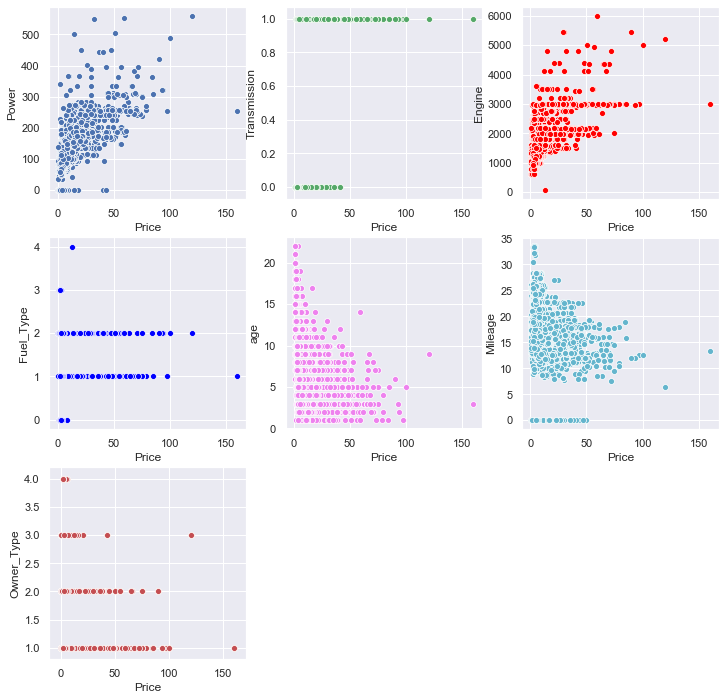

In [43]:
# scatterplot of different columns with price
import seaborn as sns
sns.set(rc={"figure.figsize":(12,12)})
plt.subplot(3,3,1)
sns.scatterplot(train["Price"],train["Power"])
plt.subplot(3,3,2)
sns.scatterplot(train["Price"],train["Transmission"],color='g')
plt.subplot(3,3,3)
sns.scatterplot(train["Price"],train["Engine"],color='red')
plt.subplot(3,3,4)
sns.scatterplot(train["Price"],train["Fuel_Type"],color="blue")
plt.subplot(3,3,5)
sns.scatterplot(train["Price"],train["age"],color='violet')
plt.subplot(3,3,6)
sns.scatterplot(train["Price"],train["Mileage"],color='c')
plt.subplot(3,3,7)
sns.scatterplot(train["Price"],train["Owner_Type"],color='orange')
plt.subplot(3,3,7)
sns.scatterplot(train["Price"],train["Owner_Type"],color='r')

### Linear Regression

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [45]:
 #power,engine,Transmission with a positive realtion while mileage,
 #   age,Fuel_Type, owner type are having inverse relation with price
X=train[['age','Fuel_Type','Transmission','Mileage','Engine',"Location","Power"]]
Y=train['Price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.20,random_state=10)

In [47]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_predict=model.predict(X_test)
print(y_predict)
print(y_test)

[-2.24069529 -1.65016411 23.38624932 ... 11.8916471  11.90982027
  6.90718804]
1463     1.50
181      1.45
2506    25.75
3374     8.90
5816     3.00
        ...  
3041     6.35
4348     9.75
2112     9.95
1437     9.20
2802     5.50
Name: Price, Length: 1204, dtype: float64


In [49]:
model.score(X_train, y_train)

0.6666805263250855

In [50]:
model.score(X_test,y_test)

0.6888599319233912

In [51]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_predict)
mae

3.6725369186905485

In [52]:
from sklearn.metrics import mean_squared_error
Mse=mean_squared_error(y_test,y_predict)
Mse

34.267184980874546

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6888599319233912

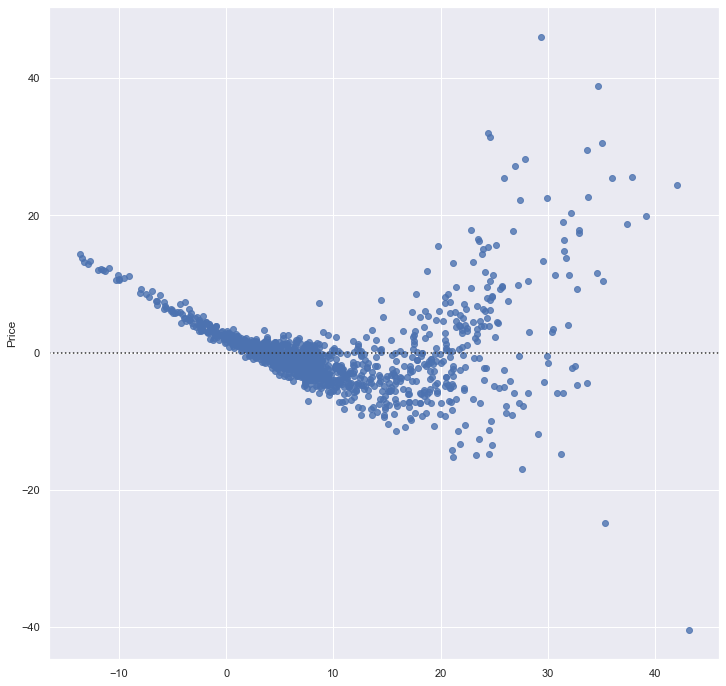

In [54]:
sns.residplot(x=y_predict, y=y_test)

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=20,random_state=10)

In [56]:
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [57]:
regr.score(X_train,y_train)

0.9833786548124606

In [58]:
regr.score(X_test,y_test)

0.8622826672442867

In [59]:
y_predict=regr.predict(X_test)
print(y_predict)
print(y_test)

[ 1.58133333  1.7625     25.91416667 ... 10.7625     10.776
  4.90591667]
1463     1.50
181      1.45
2506    25.75
3374     8.90
5816     3.00
        ...  
3041     6.35
4348     9.75
2112     9.95
1437     9.20
2802     5.50
Name: Price, Length: 1204, dtype: float64


In [60]:
mae=mean_absolute_error(y_test,y_predict)
mae

1.4848577276382715

In [61]:
Mse=mean_squared_error(y_test,y_predict)
Mse

15.167398226096442

In [62]:
r2_score(y_test,y_predict)

0.8622826672442867

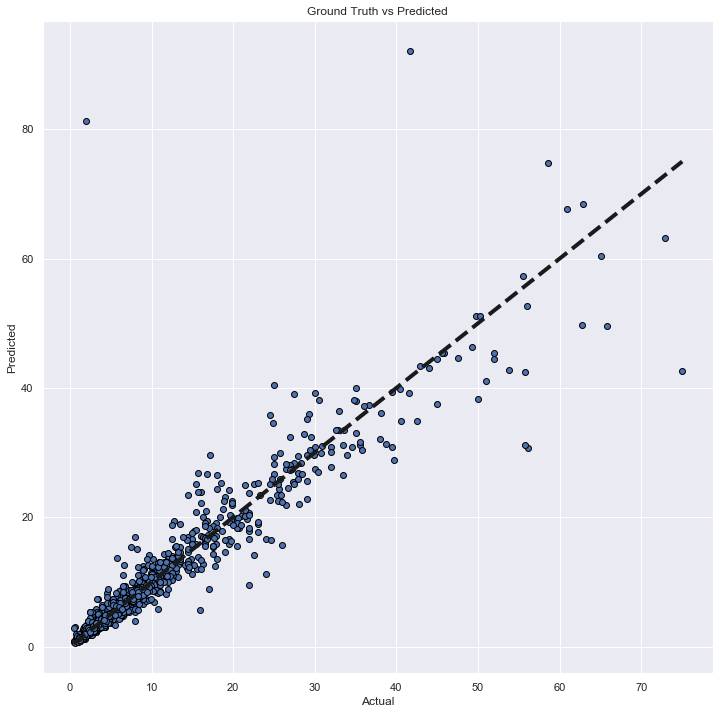

In [63]:
fig, ax = plt.subplots()

ax.scatter(y_test, y_predict, edgecolors=(0, 0, 0))

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

ax.set_xlabel('Actual')

ax.set_ylabel('Predicted')

ax.set_title("Ground Truth vs Predicted")

plt.show()

# SVM

In [64]:
from sklearn.svm import SVR
reg= SVR().fit(X_train,y_train)
print(reg)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [65]:
y_predict=reg.predict(X_test)
print(y_predict)
print(y_test)

[ 6.71126068  4.71441574 11.30798296 ...  7.28410109  6.64867893
  4.26139503]
1463     1.50
181      1.45
2506    25.75
3374     8.90
5816     3.00
        ...  
3041     6.35
4348     9.75
2112     9.95
1437     9.20
2802     5.50
Name: Price, Length: 1204, dtype: float64


In [66]:
r2_score(y_test,y_predict)

0.4233099899410122

In [67]:
Mse=mean_squared_error(y_test,y_predict)
Mse

63.51333460031274

In [68]:
mae=mean_absolute_error(y_test,y_predict)
mae

4.337323345190665

In [69]:
reg.score(X_test,y_test)

0.4233099899410122

### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=10)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [71]:
y_predict=regressor.predict(X_test)
print(y_predict)
print(y_test)

[ 1.45  1.55 25.64 ... 10.9  13.34  4.25]
1463     1.50
181      1.45
2506    25.75
3374     8.90
5816     3.00
        ...  
3041     6.35
4348     9.75
2112     9.95
1437     9.20
2802     5.50
Name: Price, Length: 1204, dtype: float64


In [72]:
mae=mean_absolute_error(y_test,y_predict)
mae

1.9414652547065336

In [73]:
Mse=mean_squared_error(y_test,y_predict)
Mse

30.892122263819676

In [74]:
r2_score(y_test,y_predict)

0.7195049132410389

### Find the price in test data

Since we get the best test results from Random Forest so find thee price using random forest in test data

In [75]:
X=train[['age','Fuel_Type','Transmission','Mileage','Engine',"Location","Power","Owner_Type"]]
Y=train['Price']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.20,random_state=10)

In [77]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=20,random_state=10)

In [78]:
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [79]:
y_predict=regr.predict(X_test)
print(y_predict)
print(y_test)

[ 1.77183333  1.7525     26.3045     ... 10.7675     10.585
  4.71425   ]
1463     1.50
181      1.45
2506    25.75
3374     8.90
5816     3.00
        ...  
3041     6.35
4348     9.75
2112     9.95
1437     9.20
2802     5.50
Name: Price, Length: 1204, dtype: float64


In [80]:
X_find=test[['age','Fuel_Type','Transmission','Mileage','Engine',"Location","Power","Owner_Type"]]


In [81]:
y_find=regr.predict(X_find)
print(y_find)

[ 3.22        2.3855     16.7825     ...  2.81629762  5.00175
 22.53066667]


In [82]:
test["Price"]=y_find

In [85]:
test.head(5)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company,Car_Name,Model,age,Price
0,Maruti Alto K10 LXI CNG,4,40929,0,0,1,32.26,998.0,58.20,4.0,16,16,128,6,3.220000
1,Maruti Alto 800 2016-2019 LXI,3,54493,2,0,2,24.70,796.0,47.30,5.0,16,16,56,7,2.385500
2,Toyota Innova Crysta Touring Sport 2.4 MT,9,34000,1,0,1,13.68,2393.0,147.80,7.0,26,78,86,3,16.782500
3,Toyota Etios Liva GD,5,139000,1,0,1,23.59,1364.0,0.00,5.0,26,60,139,8,3.544500
4,Hyundai i20 Magna,9,29000,2,0,1,18.50,1197.0,82.85,5.0,9,159,145,6,3.757792
